In [56]:
from google.colab import files
up=files.upload()


Saving iris_csv.csv to iris_csv.csv


In [0]:
import io
data=pd.read_csv(io.BytesIO(up["iris_csv.csv"]))

In [58]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('husl')
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
data.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
data.describe


<bound method NDFrame.describe of      sepallength  sepalwidth  petallength  petalwidth           class
0            5.1         3.5          1.4         0.2     Iris-setosa
1            4.9         3.0          1.4         0.2     Iris-setosa
2            4.7         3.2          1.3         0.2     Iris-setosa
3            4.6         3.1          1.5         0.2     Iris-setosa
4            5.0         3.6          1.4         0.2     Iris-setosa
..           ...         ...          ...         ...             ...
145          6.7         3.0          5.2         2.3  Iris-virginica
146          6.3         2.5          5.0         1.9  Iris-virginica
147          6.5         3.0          5.2         2.0  Iris-virginica
148          6.2         3.4          5.4         2.3  Iris-virginica
149          5.9         3.0          5.1         1.8  Iris-virginica

[150 rows x 5 columns]>

In [63]:
data['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [72]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
Id,,,,,
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


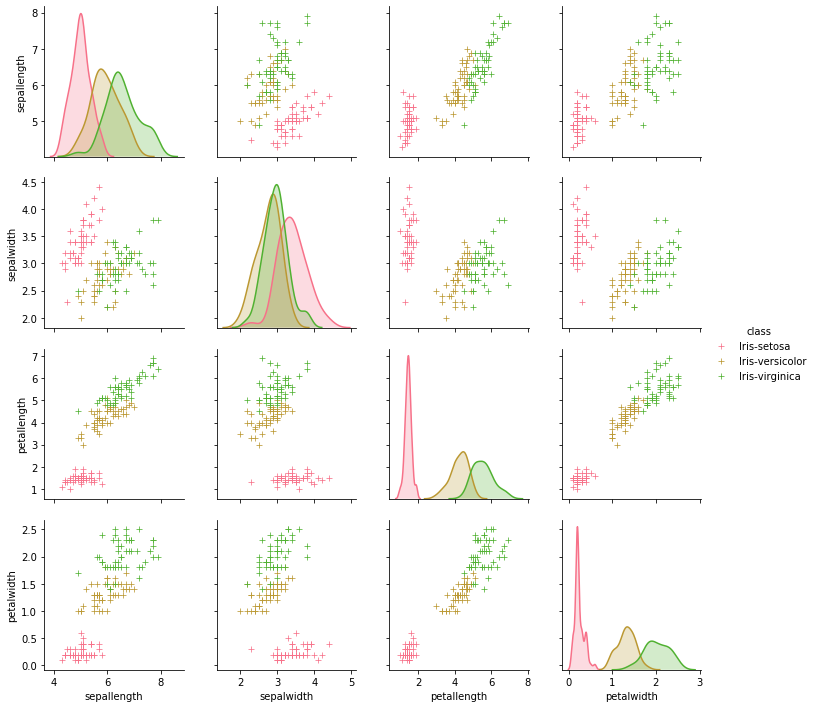

In [77]:
tmp = data.drop(0)
g = sns.pairplot(tmp, hue='class', markers='+')
plt.show()

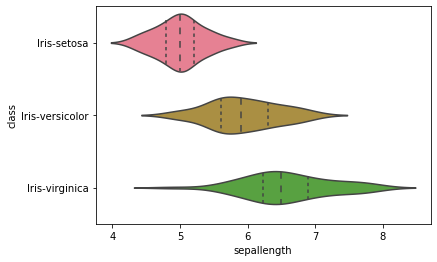

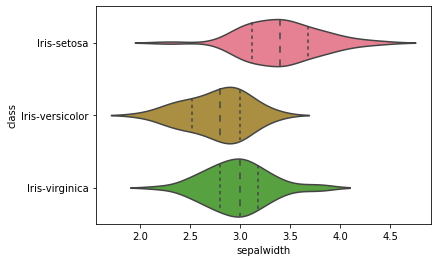

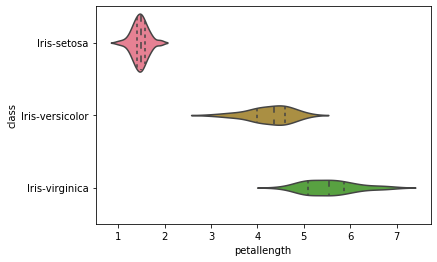

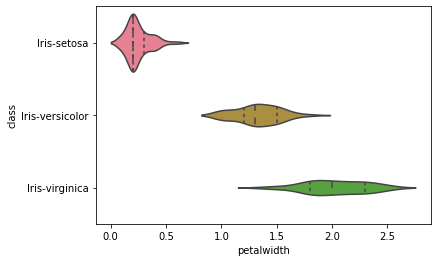

In [81]:
g = sns.violinplot(y='class', x='sepallength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='sepalwidth', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petallength', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='class', x='petalwidth', data=data, inner='quartile')
plt.show()

In [0]:
C=data.drop(['class'],axis=1)
X=C.head(149)

In [0]:
Z=data['class']
Y=Z.head(149)

In [96]:

print(X.shape)
print(Y.shape)

(149, 4)
(149,)


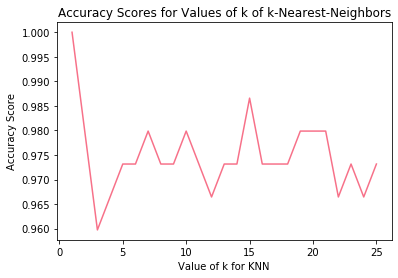

In [97]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(Y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [0]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(Y, y_pred))

In [101]:
print(metrics.accuracy_score(Y, y_pred))

0.9731543624161074


In [103]:
logreg = LogisticRegression()
logreg.fit(X, Y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(Y, y_pred))

0.9664429530201343


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(89, 4)
(89,)
(60, 4)
(60,)


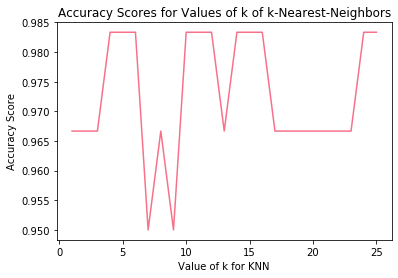

In [105]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [106]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9166666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [109]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, Y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['Iris-versicolor'], dtype=object)